In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image #
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(777)
IMAGE_SIZE=128

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
original_datasets=ImageFolder(root='Mosquito_Data/',
                              transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                              ]))

In [4]:
print(original_datasets)

Dataset ImageFolder
    Number of datapoints: 626
    Root location: Mosquito_Data/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [5]:
original_loader=DataLoader(original_datasets,
                           batch_size=626,
                           shuffle=True,
                           drop_last=False,
                           num_workers=1) 

In [6]:
for X, Y in original_loader:
    print(X.size(), Y.size()) 
    print(Y) # Y는 라벨링된 값
    break

torch.Size([626, 3, 128, 128]) torch.Size([626])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0,
        0, 0, 2, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1,
        0, 1, 0, 2, 0, 4, 2, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        2, 4, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0,
        4, 0, 0, 3, 0, 0, 0, 4, 0, 4, 0, 0, 2, 4, 0, 0, 4, 2, 4, 1, 0, 0, 0, 0,
        0, 4, 1, 0, 0, 4, 3, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 4, 0, 3,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 3, 0, 0,
        0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 4, 4, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 4, 0, 3, 3, 0, 0, 4, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 4, 3,
        2, 0, 4, 2, 4, 0, 0, 2, 4, 0, 0, 4, 2, 3, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
        0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1,
        0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 4, 4, 0, 4, 0, 1, 0, 2, 

In [7]:
# 이미지 로더로 부터 이미지와 label을 추출
#total_batch=len(original_loader)
#print(total_batch)
#for i in range(total_batch):
original_images, labels=next(iter(original_loader)) 
#loader로부터 원래의 이미지로부터 새로운 이미지와 레이블 추출
print(original_images.shape)
print(labels.shape)

torch.Size([626, 3, 128, 128])
torch.Size([626])


In [11]:
print(labels[:20])

tensor([3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 1, 2, 0, 0, 4, 1])


In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

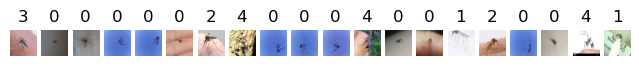

In [14]:
plt.figure(figsize=(8,2))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [15]:
X1=original_images #3,128,128 : 채널, 행, 열
Y1=labels
print(X1.size(), Y1.size())

torch.Size([626, 3, 128, 128]) torch.Size([626])


In [16]:
Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [18]:
transforms_datasets=ImageFolder(root='Mosquito_Data/',
                                transform=Image_transform)
transforms_loader=DataLoader(transforms_datasets,
                             batch_size=100, 
                             shuffle=True,
                             num_workers=1)

In [19]:

transforms_images, transforms_labels=next(iter(transforms_loader))

In [20]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0)
Y2=torch.cat([Y1, transforms_labels],dim=0)
print(X2.size(), Y2.size())

torch.Size([100, 3, 128, 128]) torch.Size([100])
torch.Size([726, 3, 128, 128]) torch.Size([726])


In [21]:
none_datasets=ImageFolder(root='Mosquito_Data/',
                                transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                                  ]))
none_loader=DataLoader(none_datasets,
                             batch_size=100, 
                             shuffle=False,
                             num_workers=1)

In [22]:
none_images, none_labels=next(iter(none_loader))

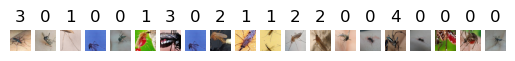

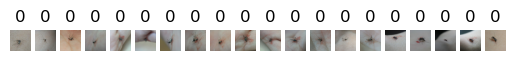

In [23]:
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [24]:
def create_loader(transform):
    transforms_datasets=ImageFolder(root='Mosquito_Data',
                                    transform=transform)
    transform_loader=DataLoader(transforms_datasets,
                                batch_size=100,
                                shuffle=True,
                                num_workers=1)
    
    transform_images, labels=next(iter(transform_loader))
    return transform_images, labels

In [25]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                           contrast=(1,1),
                           saturation=(0.7,0.9),
                           #hue=(-0.2,0.2)
                        ),
    transforms.ToTensor()                          
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

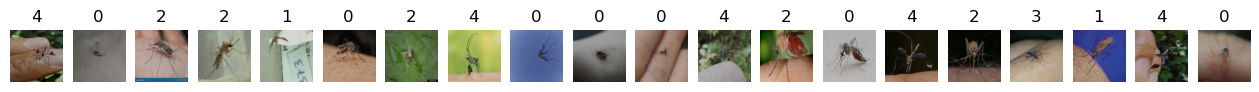

In [26]:
plt.figure(figsize=(16,4))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [27]:
X3=torch.cat([X2, color_tf_images], dim=0)
Y3=torch.cat([Y2, color_tf_labels], dim=0)
print(X3.size(), Y3.size())

torch.Size([826, 3, 128, 128]) torch.Size([826])


In [28]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),  # 수평 뒤집기
    transforms.ToTensor()
])
flip_tf_images, flip_tf_labels=create_loader(image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0)
Y4=torch.cat([Y3, flip_tf_labels],dim=0)
print(X4.size(), Y4.size())

torch.Size([926, 3, 128, 128]) torch.Size([926])


In [29]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-15, 15),
        interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

rot_tf_images, rot_tf_labels=create_loader(image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0)
Y5=torch.cat([Y4, rot_tf_labels], dim=0)
print(X5.size(), Y5.size())

torch.Size([1026, 3, 128, 128]) torch.Size([1026])


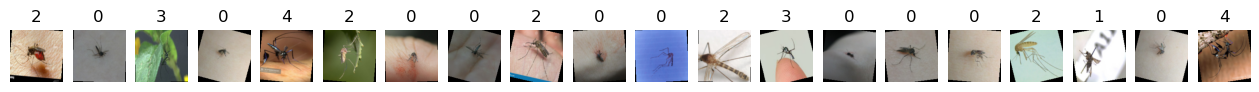

In [30]:
plt.figure(figsize=(16,4))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.title(rot_tf_labels[i].item())
    plt.imshow(rot_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [31]:
cnt0=(Y5==0).sum() 
cnt1=(Y5==1).sum()
cnt2=(Y5==2).sum()
cnt3=(Y5==3).sum()
cnt4=(Y5==4).sum()

print(cnt0, cnt1, cnt2, cnt3, cnt4)

tensor(592) tensor(68) tensor(170) tensor(53) tensor(143)


In [32]:
X=X5
Y=Y5
ratios=[0.8,0.2]
print(Y.size())
train_cnt=int(Y.size(0)*ratios[0])
test_cnt=int(Y.size(0)*ratios[1])
cnts=[train_cnt, test_cnt]
print(train_cnt, test_cnt)

torch.Size([1026])
820 205


In [33]:
indices=torch.randperm(X.size(0))
print(indices[:10])

tensor([411, 476, 189, 913, 192, 637, 644, 513, 213, 547])


In [34]:
x=torch.index_select(X, dim=0, index=indices)
y=torch.index_select(Y, dim=0, index=indices)
x_train=x[:cnts[0]]
x_test=x[cnts[0]:]
y_train=y[:cnts[0]]
y_test=y[cnts[0]:]

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())

torch.Size([820, 3, 128, 128]) torch.Size([820])
torch.Size([206, 3, 128, 128]) torch.Size([206])


In [35]:
train_dataset=TensorDataset(x_train, y_train)
test_dataset=TensorDataset(x_test, y_test)


train_loader=DataLoader(train_dataset,
                        batch_size=100,
                        shuffle=True,
                        drop_last=False)
test_loader=DataLoader(test_dataset)

In [36]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # 입력(3, 128, 128)
        self.conv1=nn.Conv2d( #3, 128,128
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv2=nn.Conv2d( #8, 64,64
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv3=nn.Conv2d( #16, 32,32
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv4=nn.Conv2d( #32, 16,16
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv5=nn.Conv2d( #64, 8,8
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(128*4*4, 128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,5)
    
    def forward(self, x): #(3,128,128)
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x) #(8,64,64)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x) #(16,32,32)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x) #(32,16,16)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x) #(64,8,8)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x) #(128,4,4)

        x=x.view(-1, 4*4*128)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1)
        return x

In [37]:
model =CNN().to(device)
print(model)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)


In [38]:
def train(model, train_loader, optimizer, interval):
    model.train() #모델의 훈련 mode로 설정

    for batch_index,(image, label) in enumerate(train_loader):
        image=image.to(device)
        label=label.to(device)

        optimizer.zero_grad()
        y_hat=model(image)
        loss=criterion(y_hat, label)
        loss.backward()
        optimizer.step()

        if batch_index % interval==0:
            print('train Epoch:{}, Train Loss:{}'.format(epoch, loss.item()))

In [39]:
def evaluate(model, test_loader):
    model.eval() #모데을 평가모드로 설정
    test_loss=0
    correct=0
    
    with torch.no_grad():
        for image, label in test_loader:
            image=image.to(device)
            label=label.to(device)
            y_hat=model(image)
            test_loss+=criterion(y_hat, label).item()
            predition=y_hat.argmax(dim=1)
            correct+=(predition==label).sum()
    
    test_loss=test_loss/len(test_loader.dataset)
    test_accuracy=correct/len(test_loader.dataset)*60
    return test_loss, test_accuracy

In [40]:
epochs=200
for epoch in range(1, epochs+1):
    train(model, train_loader, optimizer, interval=100)
    test_loss, test_accuracy=evaluate(model, test_loader)
    print('epoch:{}, test loss:{}, test accuracy:{}'
          .format(epoch, test_loss, test_accuracy))

train Epoch:1, Train Loss:1.598935842514038
epoch:1, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:2, Train Loss:1.3848326206207275
epoch:2, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:3, Train Loss:1.2448326349258423
epoch:3, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:4, Train Loss:1.3648326396942139
epoch:4, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:5, Train Loss:1.3148325681686401
epoch:5, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:6, Train Loss:1.3048325777053833
epoch:6, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:7, Train Loss:1.3348326683044434
epoch:7, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:8, Train Loss:1.324832558631897
epoch:8, test loss:1.2689100330315748, test accuracy:38.155338287353516
train Epoch:9, Train Loss:1.354832649230957
epoch:9, test loss:1.2

In [41]:
path='model1.pt'
torch.save(model.state_dict(), path)

In [42]:
model2=CNN().to(device)
model2.load_state_dict(torch.load(path))
model2.eval()


C:\Users\it\AppData\Local\Temp\ipykernel_25360\2502779911.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(path))


CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [43]:
predict=model2(x_test[1].to(device)).argmax(dim=1)
print(predict.item(), y_test[1].item())

0 0


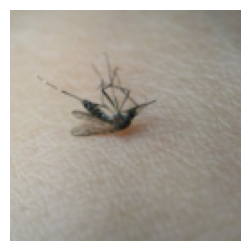

In [44]:
plt.figure(figsize=(3, 3))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(x_test[1].permute(1, 2, 0))
plt.axis('off')
plt.show()